# Processamento de bordas - asl_alphabet_train

In [19]:
from scipy.ndimage import zoom #Dar o zoom do corte


def clipped_zoom(img, zoom_factor, **kwargs):

    h, w = img.shape[:2]

    # For multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # Zooming out
    if zoom_factor < 1:

        # Bounding box of the zoomed-out image within the output array
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        # Zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)

    # Zooming in
    elif zoom_factor > 1:

        # Bounding box of the zoomed-in region within the input array
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)

        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # If zoom_factor == 1, just return the input array
    else:
        out = img
    return out

T


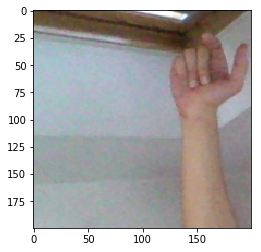

Z


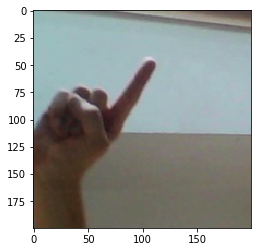

S


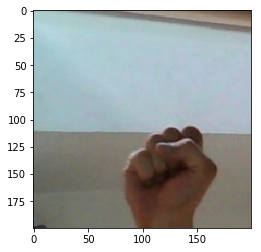

E


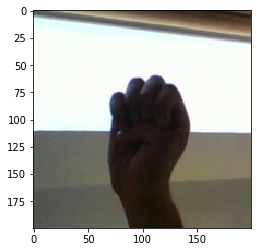

I


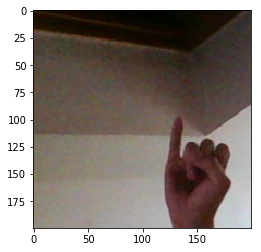

J


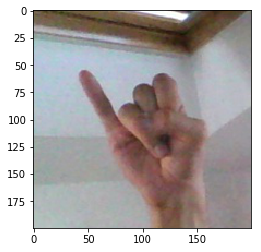

X


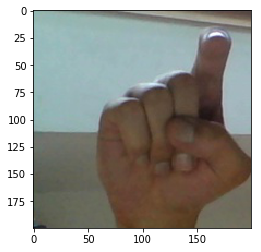

Y


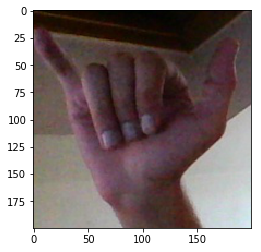

del


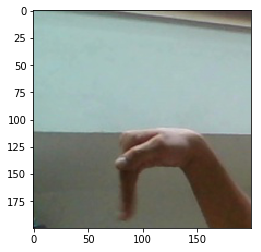

B


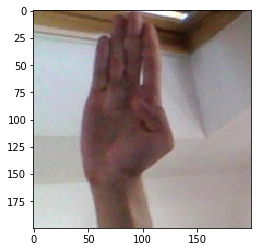

P


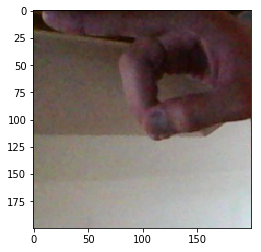

H


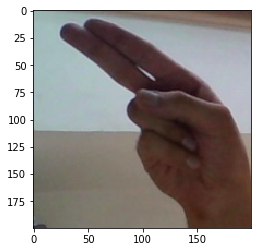

M


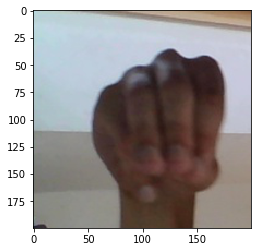

L


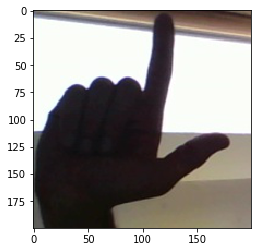

space


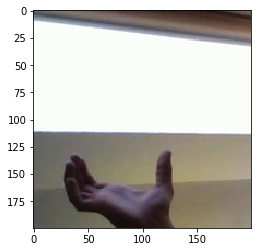

K


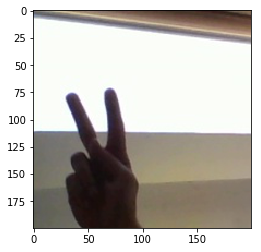

nothing


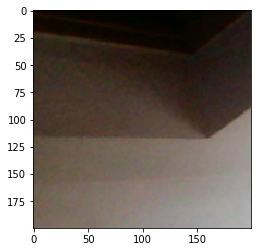

V


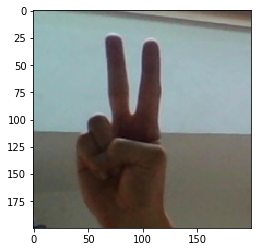

A


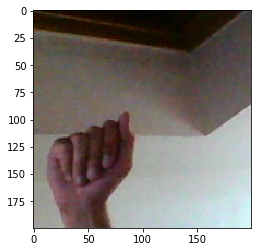

R


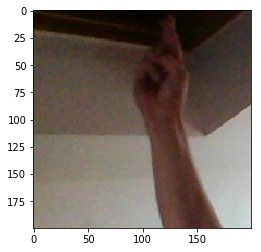

G


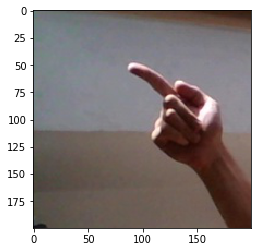

D


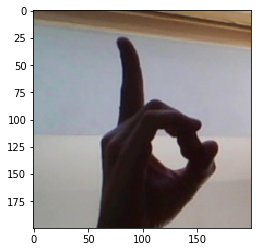

W


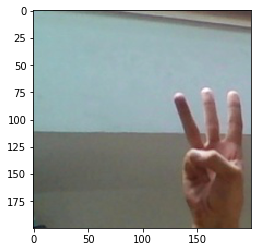

C


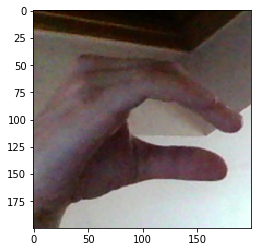

N


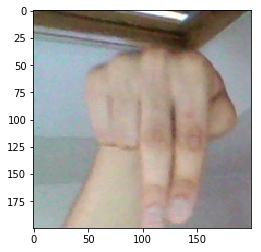

F


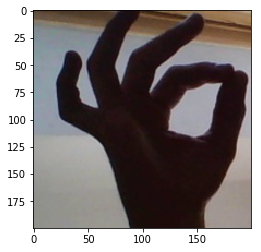

U


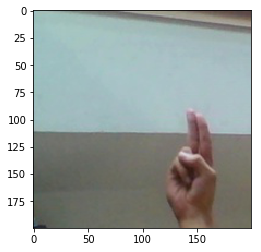

Q


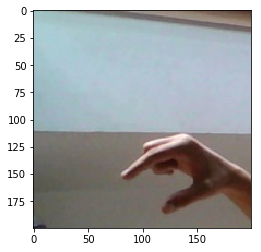

O


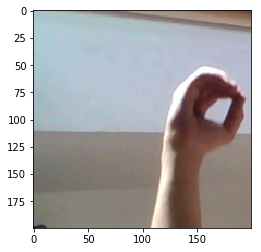

In [20]:
import os
from PIL import Image

#Primeiro vamos navegar até a pasta correta com o auxilio das funções do SO
database = "asl_alphabet_train"
save_folder = "asl_alphabet_train_no_border"
os.mkdir(save_folder)
for letras in os.listdir(database):
    primeira = True
    pastas = database + '/' + letras
    os.mkdir(save_folder + '/' + letras)
    for images in os.listdir(pastas):
        img_path = pastas + '/' + images
        
        #Carregamento da imagem e retransformação da mesma em RGB
        img_file = cv2.imread(img_path, 3)
        b,g,r = cv2.split(img_file)
        img_file = cv2.merge([r,g,b])
        
        #Corta as bordas dando um pequeno zoom nela
        img_file = clipped_zoom(img_file, 1.1)
        
        #Printa a imagem
        print(letras)
        pyplot.imshow(img_file)
        pyplot.show()
        #Salvamos a imagem
        im = Image.fromarray(img_file)
        im.save(save_folder + '/' + letras + '/' + images)
        
        break #Isso é útil para imprimir apenas a primeira imagem e cancelar o for

# Augmentation

In [25]:
#Para a geração de imagens
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
#from skimage.transform import resize
#from scipy import ndimage

In [26]:
train_dir1 = "asl_alphabet_train"
train_dir2 = "dataset5/A/a"

import os
import cv2
import numpy as np

def get_img(train_dir):
    image_name = os.listdir(train_dir)
    img_file = cv2.imread(train_dir + '/' + image_name[0], 3)
    print(img_file.shape)
    b,g,r = cv2.split(img_file)
    img_file = cv2.merge([r,g,b])
    return img_file

## asl_alphabet_train - A

In [19]:
img_file = get_img("asl_alphabet_train/A")
print("type:", type(img_file), "shape:", img_file.shape)
img_file = clipped_zoom(img_file, 1.2)

(200, 200, 3)
type: <class 'numpy.ndarray'> shape: (200, 200, 3)


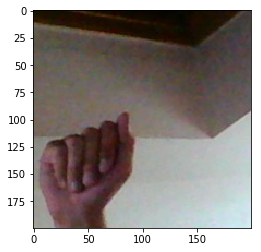

type: <class 'numpy.ndarray'> shape: (200, 200, 3)


In [22]:
pyplot.imshow(img_file)
pyplot.show()
print("type:", type(img_file), "shape:", img_file.shape)
img_file = img_file.reshape(1, 200, 200, 3)

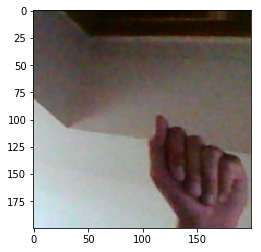

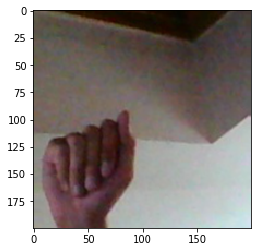

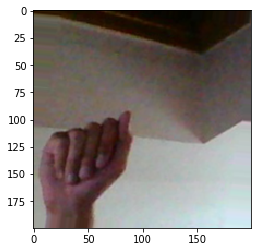

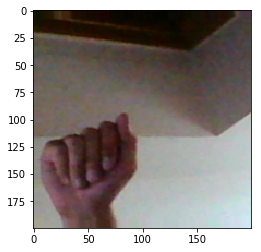

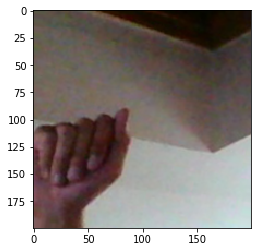

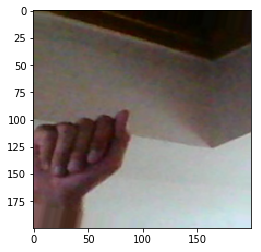

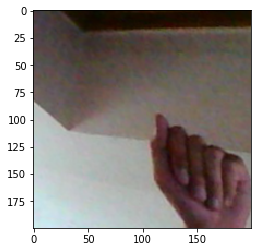

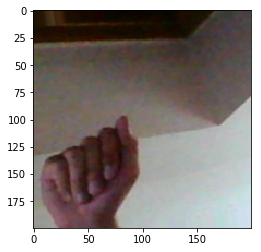

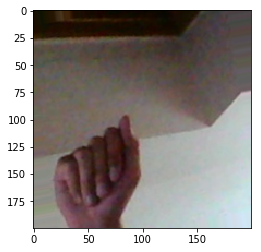

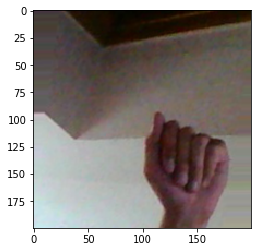

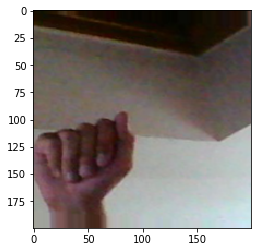

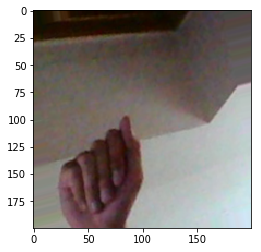

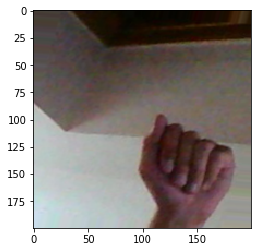

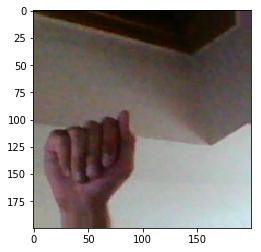

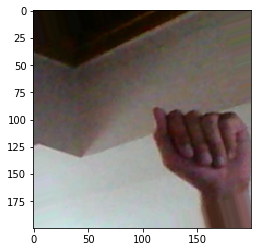

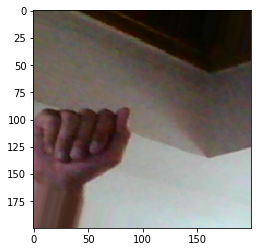

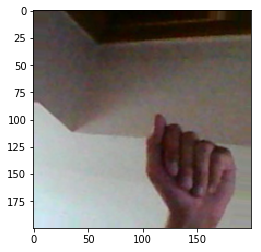

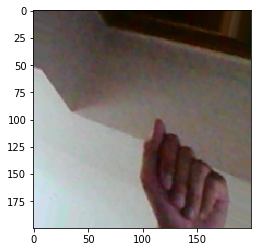

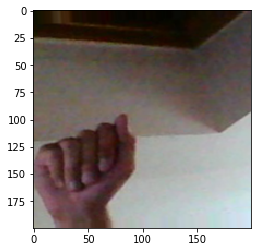

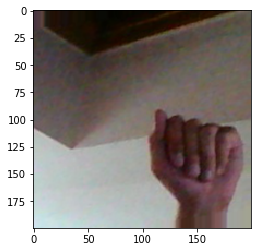

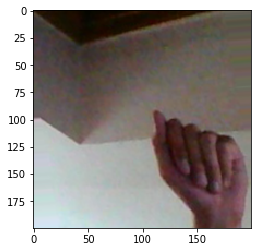

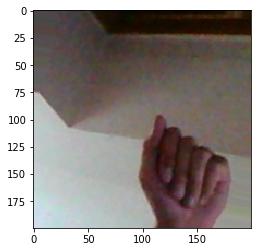

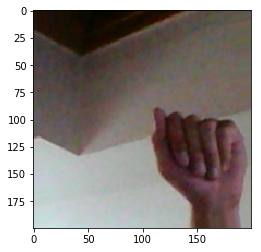

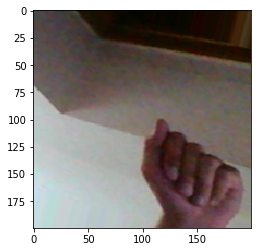

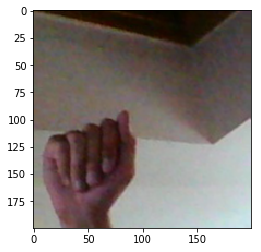

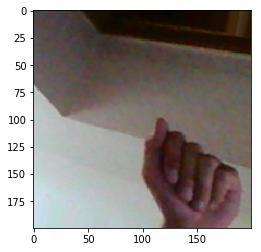

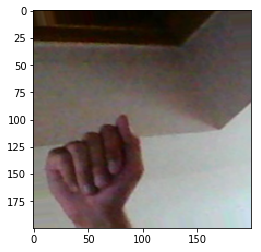

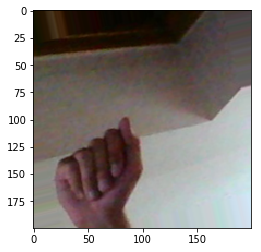

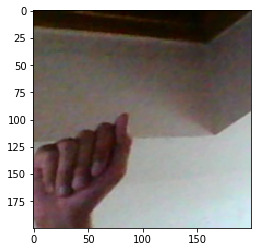

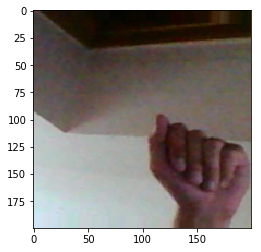

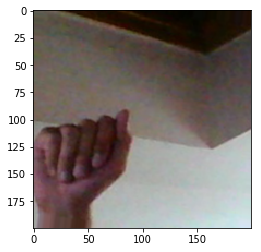

In [29]:
#Geração imagem letra A
gerador_treinamento = ImageDataGenerator(rotation_range = 15,
                                         shear_range = 10,
                                         zoom_range = 0.1,
                                         horizontal_flip = True,
                                        )

j = 0
for X_batch in gerador_treinamento.flow(img_file, batch_size = 3):
    X_batch = X_batch.reshape(200, 200, 3)
    pyplot.imshow(X_batch.astype("int32"))
    pyplot.show()
    if j == 30:
        break
    print("==================================================================================")
    j+=1

In [16]:
def interval_mapping(image, from_min, from_max, to_min, to_max):
    from_range = from_max - from_min
    to_range = to_max - to_min
    scaled = np.array((image - from_min) / float(from_range), dtype=float)
    return to_min + (scaled * to_range)

In [82]:
imageSize = 100
s_mask = 17
import os
import cv2
import numpy as np
image_name = os.listdir(train_dir2)
img_file = cv2.imread(train_dir2 + '\\' + image_name[0], 0)
#b,g,r = cv2.split(img_file)
#img_file = cv2.merge([r,g,b])
img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 1), mode='reflect')
sobelx = np.abs(cv2.Sobel(img_file, cv2.CV_64F, 1, 0, ksize=s_mask))
sobelx = interval_mapping(sobelx, np.min(sobelx), np.max(sobelx), 0, 255)
sobely = np.abs(cv2.Sobel(img_file,cv2.CV_64F,0,1,ksize=s_mask))
sobely = interval_mapping(sobely, np.min(sobely), np.max(sobely), 0, 255)
sobel_xy = 0.5 * sobelx + 0.5 * sobely
sobel_xy = skimage.transform.resize(sobel_xy, (imageSize, imageSize), mode='reflect')

In [76]:
print(sobelx.shape)
sobel_xy = sobel_xy.reshape(100,100)
print(sobel_xy.shape)

(119, 106)
(100, 100)


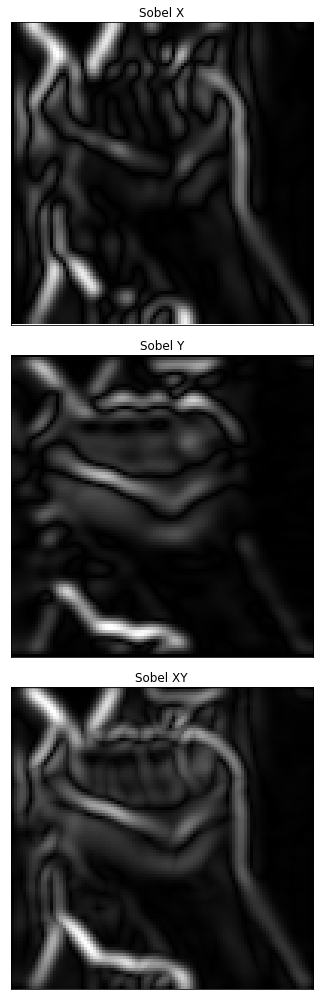

In [83]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 14))
plt.subplot(3,2,1),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,5),plt.imshow(sobel_xy,cmap = 'gray')
plt.title('Sobel XY'), plt.xticks([]), plt.yticks([])
plt.tight_layout()

plt.show()